## Importing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. Eksplorasi Data awal

In [ ]:
# Load data kita ke sebuah dataframe
data = pd.read_csv('/content/grocery_dataset_with_issues.csv')

In [ ]:
# tampilkan jumlah baris dan data
data.shape

(5000, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    5000 non-null   object 
 1   Category   5000 non-null   object 
 2   Price      4262 non-null   float64
 3   City       5000 non-null   object 
 4   OrderDate  4854 non-null   object 
 5   Discount   5000 non-null   float64
 6   Profit     5000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


In [ ]:
# tampilkan 10 baris pertama
data.head(10)

,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,Meat,NaN,Houston,2023-12-16,0.42,4.80
1,7daa9d0e,Seafood,91.96,Houston,2023-11-17,0.43,86.15
2,43fd0737,Maat,NaN,Chicago,2023-04-15,0.31,26.77
3,dc59b78a,Bakery,80.90,New York,2023-12-18,0.33,-30.45
4,3c4975c5,Maat,NaN,Chicago,2023-12-29,0.40,21.85
5,2972afb8,Bakry,NaN,Chicago,2023-12-27,0.45,51.89
6,45cc3746,Snacks,316.16,Los Angeles,2023-08-21,0.44,26.89
7,753b536f,Seafood,370.07,Houston,2023-03-19,0.17,38.91
8,18f05a1a,Householdd,61.52,New York,2023-02-21,0.00,-16.43
9,0e0cf55f,Bakry,430.51,Houston,2023-09-30,0.22,-40.50


## 2. Pengecekan missing value

In [ ]:
# lihat informasi dari data kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    5000 non-null   object 
 1   Category   5000 non-null   object 
 2   Price      4262 non-null   float64
 3   City       5000 non-null   object 
 4   OrderDate  4854 non-null   object 
 5   Discount   5000 non-null   float64
 6   Profit     5000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


Terdapat 2 kolom yang memiliki missing values. Kita akan investigasi lebih lanjut

In [ ]:
# hitung jumlah missing value di tiap kolom
data.isna().sum()

,0
OrderID,0
Category,0
Price,738
City,0
OrderDate,146
Discount,0
Profit,0


In [ ]:
# hitung proporsi missing value di tiap kolom
(data.isna().sum() / data.shape[0]) * 100

,0
OrderID,0.00
Category,0.00
Price,14.76
City,0.00
OrderDate,2.92
Discount,0.00
Profit,0.00


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom
data[data['OrderDate'].isna()].head(10)

,OrderID,Category,Price,City,OrderDate,Discount,Profit
54,8bd2c9cb,Seafood,141.79,Houston,NaN,0.10,-4.09
68,d4a67cfa,Meat,284.73,New York,NaN,0.04,-8.66
69,e86a3620,Seafood,288.02,Los Angeles,NaN,0.27,25.19
77,84cfb25d,Householdd,187.58,Chicago,NaN,0.35,55.55
81,26734dfd,Sea food,139.11,Chicago,NaN,0.43,15.83
90,c0794b0c,Snacks,220.81,Chicago,NaN,0.09,72.21
92,91d9ab15,Seafood,5.03,New York,NaN,0.28,-15.48
151,850136fc,Householdd,62.60,New York,NaN,0.13,70.49
224,be1455c7,Maat,359.94,New York,NaN,0.02,-27.93
264,0484f12e,Householdd,73.18,New York,NaN,0.16,-32.39


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom
data[data['Price'].isna()].head(10)

,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,Meat,NaN,Houston,2023-12-16,0.42,4.80
2,43fd0737,Maat,NaN,Chicago,2023-04-15,0.31,26.77
4,3c4975c5,Maat,NaN,Chicago,2023-12-29,0.40,21.85
5,2972afb8,Bakry,NaN,Chicago,2023-12-27,0.45,51.89
10,f37f7e5b,Sneks,NaN,Chicago,2023-07-16,0.46,27.11
11,d456a81f,Seafood,NaN,Chicago,2023-08-11,0.37,0.15
14,a016ef56,Meat,NaN,Chicago,2023-07-12,0.34,89.48
18,7305ecdc,Sneks,NaN,New York,2023-01-14,0.25,31.01
27,68ce2828,Householdd,NaN,Los Angeles,2023-08-19,0.45,-21.53
38,86798c28,Bakry,NaN,New York,2023-06-06,0.14,36.48


Missing value pada dataset tersebut ditemukan pada kolom place dan order date. Jumlah mising value pada kolom price dan orderdate secara berturut turut adalah 146 dan 738 dengan proporsi 2.9% dan 14.7%. Maka dari itu mising value pada order date akan dihilangkan dan pada orderdate akan ditangani lebih lanjut

## 3. Pembersihan Data

### Pengecekan duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
print(f"Jumlah data duplikat: {data.duplicated().sum()}")

Jumlah data duplikat: 0


### Pengecekan kolom *Category*

In [ ]:
# mari kita lihat isi dari kolom Category
data['Category'].unique()

array(['Meat', 'Seafood', 'Maat', 'Bakery', 'Bakry', 'Snacks',
       'Householdd', 'Sneks', 'Household', 'Sea food'], dtype=object)

Ditemukan kesalahan penulisan nama Category

In [ ]:
# mari kita lihat isi dari kolom Category
data['Category'].value_counts()

,count
Category,
Maat,520
Householdd,520
Meat,516
Snacks,514
Sea food,506
Bakery,502
Bakry,502
Household,492
Seafood,473


In [ ]:
#Catat nama kategori yang salah dan benahi kata yang salah

salah=['Maat','Sneks','Sea food','Bakry','Householdd']

for i in range(len(data)):
  if data['Category'].loc[i] =="Maat" :
    data['Category'].loc[i] = "Meat"
  elif data['Category'].loc[i] =="Sneks" :
    data['Category'].loc[i] ="Snacks"
  elif data['Category'].loc[i] =="Sea food" :
    data['Category'].loc[i] ="Seafood"
  elif data['Category'].loc[i] =="Bakry" :
    data['Category'].loc[i] ="Bakery"
  elif data['Category'].loc[i] =="Householdd" :
    data['Category'].loc[i] ="Household"

In [ ]:
#Lakukan pengecekan kembali
data['Category'].value_counts()

,count
Category,
Meat,1036
Household,1012
Bakery,1004
Seafood,979
Snacks,969


### Pengecekan kolom Orderdate

In [ ]:
#Ketahui dulu tipe data pada Orderdate

data['OrderDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: OrderDate
Non-Null Count  Dtype 
--------------  ----- 
4854 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


Tipe data kolom Orderdate adalah object sehingga perlu dirubah menjadi datetime


In [ ]:
data['OrderDate']=pd.to_datetime(data['OrderDate'],format='%Y-%m-%d')

data

,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,Meat,NaN,Houston,2023-12-16,0.42,4.80
1,7daa9d0e,Seafood,91.96,Houston,2023-11-17,0.43,86.15
2,43fd0737,Meat,NaN,Chicago,2023-04-15,0.31,26.77
3,dc59b78a,Bakery,80.90,New York,2023-12-18,0.33,-30.45
4,3c4975c5,Meat,NaN,Chicago,2023-12-29,0.40,21.85
...,...,...,...,...,...,...,...
4995,19c3327b,Snacks,129.29,Los Angeles,2023-02-14,0.45,99.39
4996,c18047f0,Meat,278.30,Chicago,2023-03-01,0.39,20.69
4997,6eefbde9,Bakery,444.99,Los Angeles,2023-06-09,0.03,47.43
4998,2dc5d4b1,Household,192.34,Chicago,2023-10-26,0.01,-16.42


In [ ]:
#Cek kembali tipedata kolom Orderdate
data['OrderDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: OrderDate
Non-Null Count  Dtype         
--------------  -----         
4854 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


## Imputasi / Mengisi missing values

[]

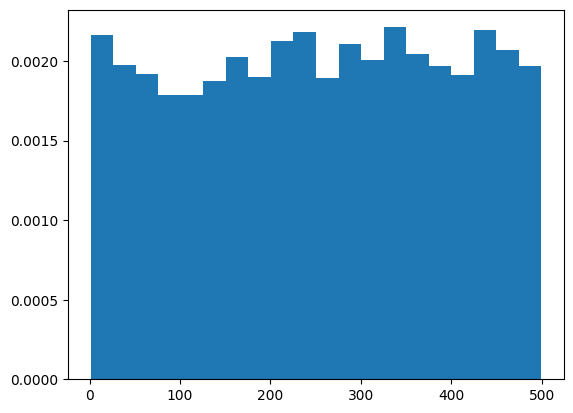

In [ ]:
# plot histogram price
plt.hist(data['Price'], density=True, bins=20)
plt.plot()

[]

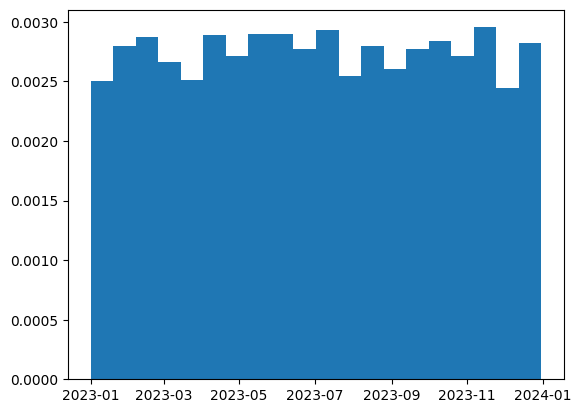

In [ ]:
plt.hist(data['OrderDate'], density=True, bins=20)
plt.plot()

Terlihat bahwa pada kolom Orderdate dan Price memiliki distribusi Uniform. Pada kolom Price akan di isi dengan rata2 karena dengan distribusi Uniform maka pada tiap kondisi memiliki kemungkinan yang sama sehingga digunakan rata-rata, sedangkan untuk kolom orderdate akan dihapus karena memiliki mising value yang sedikit dan tidak berpengaruh.

In [ ]:
# simpan nilai mean kolom price terpisah
mean_price = data['Price'].mean()
print(f"Nilai mean untuk kolom price : {mean_price}")

Nilai mean untuk kolom price : 253.06311356170812


In [ ]:
# kita lakukan imputasi dan drop missing value
data['Price'] = data['Price'].fillna(mean_price)
data = data.dropna(subset=['OrderDate'])


In [ ]:
# mari kita cek jumlah missing value
data.isna().sum()

,0
OrderID,0
Category,0
Price,0
City,0
OrderDate,0
Discount,0
Profit,0


## Mengatasi outlier

untuk mendeteksi outlier akan digunakan boxplot untuk visualisasi awal terhadap beberapa kolom numerik

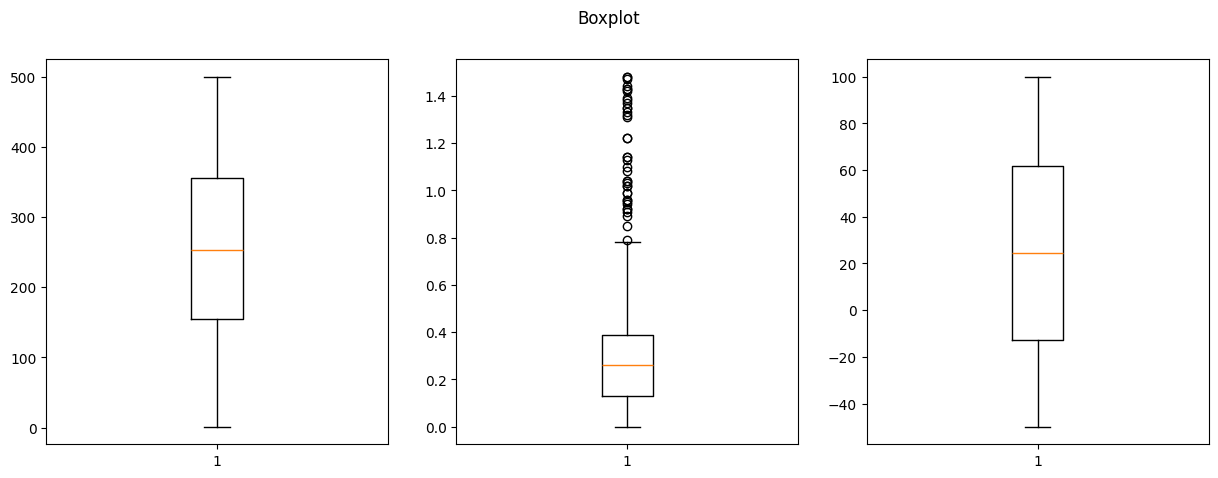

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Boxplot')

axes[0].boxplot(data['Price'])
axes[1].boxplot(data['Discount'])
axes[2].boxplot(data['Profit'])

plt.show()




terlihat bahwa kolom discount memiliki outlier yang cukup banyak. kemudian dilakukan cek jumlah outlier menggunakan fungsi cek outlier


In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom discount
upper_discount = cek_outlier('Discount', 'upper_bound')
lower_discount = cek_outlier('Discount', 'lower_bound')
print(f"Jumlah total outlier di kolom discount : {len(upper_discount) + len(lower_discount)}")

Jumlah total outlier di kolom discount : 41


karena outlier terdapat di atas upper bound maka akan di drop


In [ ]:
Q1 = data['Discount'].quantile(0.25)
Q3 = data['Discount'].quantile(0.75)
IQR = Q3 - Q1
upbound = Q3 + (1.5*IQR)


In [ ]:
# memilih baris yang terdapat outlier
rows_outlier =[]
for i in data.index:
  if data['Discount'].loc[i] > upbound:
    rows_outlier.append(i)


data.loc[rows_outlier]

,OrderID,Category,Price,City,OrderDate,Discount,Profit
114,0b68d154,Household,288.730000,Chicago,2023-04-17,1.03,79.59
160,1cf0a69a,Seafood,312.490000,Houston,2023-12-27,0.96,-31.73
333,b6273bed,Bakery,68.020000,Los Angeles,2023-03-29,0.91,92.50
761,10bf72b9,Snacks,76.470000,New York,2023-12-30,1.02,-46.80
763,81bf23f3,Household,312.780000,New York,2023-06-09,1.04,36.94
1312,60321190,Seafood,302.480000,Chicago,2023-04-16,0.94,-26.86
1345,1f470323,Seafood,249.930000,Los Angeles,2023-08-08,1.22,77.24
1355,fd179cae,Seafood,154.860000,Los Angeles,2023-08-08,1.35,2.34
1419,209e182b,Meat,498.820000,Chicago,2023-07-23,1.48,29.72
1682,749831ea,Bakery,27.060000,New York,2023-03-03,1.47,67.31


In [ ]:
# membersihkan data dari outlier

final_data = data.drop(rows_outlier)
final_data.reset_index(drop=True, inplace=True)

In [ ]:
#final_data
final_data

,OrderID,Category,Price,City,OrderDate,Discount,Profit
0,ccd8a575,Meat,253.063114,Houston,2023-12-16,0.42,4.80
1,7daa9d0e,Seafood,91.960000,Houston,2023-11-17,0.43,86.15
2,43fd0737,Meat,253.063114,Chicago,2023-04-15,0.31,26.77
3,dc59b78a,Bakery,80.900000,New York,2023-12-18,0.33,-30.45
4,3c4975c5,Meat,253.063114,Chicago,2023-12-29,0.40,21.85
...,...,...,...,...,...,...,...
4810,19c3327b,Snacks,129.290000,Los Angeles,2023-02-14,0.45,99.39
4811,c18047f0,Meat,278.300000,Chicago,2023-03-01,0.39,20.69
4812,6eefbde9,Bakery,444.990000,Los Angeles,2023-06-09,0.03,47.43
4813,2dc5d4b1,Household,192.340000,Chicago,2023-10-26,0.01,-16.42


Dataframe yang telah diberishkan memiliki jumlah record 4815 kolom sehingga masih memiliki lebih dari 50% dari data sesungguhnya.